In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv("datasets/housing/housing.csv")

In [4]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
data.drop(["longitude", "latitude"], axis=1, inplace=True)

In [6]:
data.head()

housing_median_age  total_rooms  total_bedrooms  population  households  \
0                41.0        880.0           129.0       322.0       126.0   
1                21.0       7099.0          1106.0      2401.0      1138.0   
2                52.0       1467.0           190.0       496.0       177.0   
3                52.0       1274.0           235.0       558.0       219.0   
4                52.0       1627.0           280.0       565.0       259.0   

   median_income  median_house_value ocean_proximity  
0         8.3252            452600.0        NEAR BAY  
1         8.3014            358500.0        NEAR BAY  
2         7.2574            352100.0        NEAR BAY  
3         5.6431            341300.0        NEAR BAY  
4         3.8462            342200.0        NEAR BAY

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [8]:
from sklearn.preprocessing import Imputer

In [9]:
ocean_proximity = data["ocean_proximity"]

In [10]:
numerical_data = data.drop("ocean_proximity", axis=1)

In [11]:
imputer = Imputer(strategy="median")

In [12]:
imputed_data = imputer.fit_transform(numerical_data)

In [13]:
imputed_df = pd.DataFrame(imputed_data, numerical_data.index, numerical_data.columns)

In [14]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
dtypes: float64(7)
memory usage: 1.1 MB


In [15]:
imputed_df["ocean_proximity"] = ocean_proximity

In [16]:
from sklearn.preprocessing import LabelBinarizer

In [17]:
encoder = LabelBinarizer()

In [18]:
encoder.fit(ocean_proximity)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [19]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='<U10')

In [20]:
ocean_proximity_df = pd.DataFrame(encoder.transform(ocean_proximity), columns=encoder.classes_)

In [21]:
ocean_proximity_df.head()

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          0       0       0         1           0
1          0       0       0         1           0
2          0       0       0         1           0
3          0       0       0         1           0
4          0       0       0         1           0

In [22]:
housing_post_cat = imputed_df.join(ocean_proximity_df)

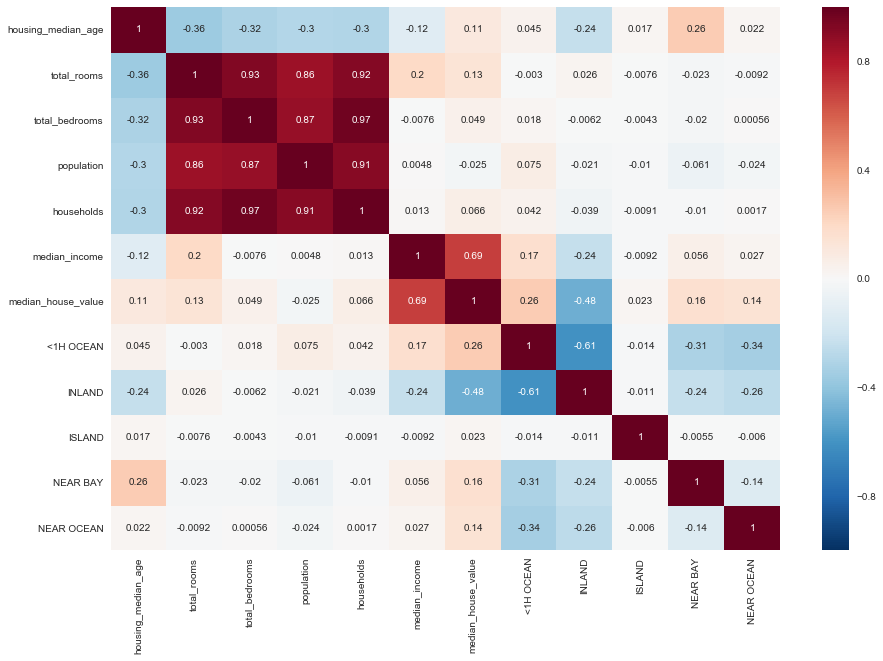

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(housing_post_cat.corr(), annot=True)

In [24]:
housing_post_cat["beedrooms_per_room"] = housing_post_cat["total_bedrooms"] / housing_post_cat["total_rooms"]

In [25]:
housing_post_cat["rooms_per_house"] = housing_post_cat["total_rooms"] / housing_post_cat["households"]

In [26]:
housing_post_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
<1H OCEAN             20640 non-null int32
INLAND                20640 non-null int32
ISLAND                20640 non-null int32
NEAR BAY              20640 non-null int32
NEAR OCEAN            20640 non-null int32
beedrooms_per_room    20640 non-null float64
rooms_per_house       20640 non-null float64
dtypes: float64(9), int32(5), object(1)
memory usage: 2.0+ MB


In [27]:
housing_post_cat.drop(["total_bedrooms", "population", "total_rooms"], axis=1, inplace=True)

In [28]:
housing_post_cat.head()

housing_median_age  households  median_income  median_house_value  \
0                41.0       126.0         8.3252            452600.0   
1                21.0      1138.0         8.3014            358500.0   
2                52.0       177.0         7.2574            352100.0   
3                52.0       219.0         5.6431            341300.0   
4                52.0       259.0         3.8462            342200.0   

  ocean_proximity  <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  \
0        NEAR BAY          0       0       0         1           0   
1        NEAR BAY          0       0       0         1           0   
2        NEAR BAY          0       0       0         1           0   
3        NEAR BAY          0       0       0         1           0   
4        NEAR BAY          0       0       0         1           0   

   beedrooms_per_room  rooms_per_house  
0            0.146591         6.984127  
1            0.155797         6.238137  
2            0.129516         8.288136  
3            0.184458         5.817352  
4            0.172096         6.281853

In [29]:
housing_post_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
housing_median_age    20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
<1H OCEAN             20640 non-null int32
INLAND                20640 non-null int32
ISLAND                20640 non-null int32
NEAR BAY              20640 non-null int32
NEAR OCEAN            20640 non-null int32
beedrooms_per_room    20640 non-null float64
rooms_per_house       20640 non-null float64
dtypes: float64(6), int32(5), object(1)
memory usage: 1.5+ MB


In [30]:
housing_post_cat.drop("ocean_proximity", axis=1, inplace=True)

In [31]:
housing_post_cat.head()

housing_median_age  households  median_income  median_house_value  \
0                41.0       126.0         8.3252            452600.0   
1                21.0      1138.0         8.3014            358500.0   
2                52.0       177.0         7.2574            352100.0   
3                52.0       219.0         5.6431            341300.0   
4                52.0       259.0         3.8462            342200.0   

   <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  beedrooms_per_room  \
0          0       0       0         1           0            0.146591   
1          0       0       0         1           0            0.155797   
2          0       0       0         1           0            0.129516   
3          0       0       0         1           0            0.184458   
4          0       0       0         1           0            0.172096   

   rooms_per_house  
0         6.984127  
1         6.238137  
2         8.288136  
3         5.817352  
4         6.281853

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(housing_post_cat.drop("median_house_value", axis=1), housing_post_cat["median_house_value"], test_size=0.3, random_state=42)

In [34]:
X_train.head()

housing_median_age  households  median_income  <1H OCEAN  INLAND  \
7061                 35.0       408.0         4.1312          1       0   
14689                20.0       496.0         2.8631          0       0   
17323                24.0       285.0         4.2026          0       0   
10056                14.0       138.0         3.1094          0       1   
15750                52.0       664.0         3.3068          0       0   

       ISLAND  NEAR BAY  NEAR OCEAN  beedrooms_per_room  rooms_per_house  
7061        0         0           0            0.165833         5.882353  
14689       0         0           1            0.244617         4.401210  
17323       0         0           1            0.176140         5.617544  
10056       0         0           0            0.186420         5.869565  
15750       0         1           0            0.222083         4.801205

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
forest = RandomForestRegressor()

In [37]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [38]:
preditions = forest.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
mse = mean_squared_error(y_test, preditions)

In [41]:
mse

4784212050.1216793

In [42]:
np.sqrt(mse)

69167.998743072501

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lin_model = LinearRegression()

In [45]:
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
predictions = lin_model.predict(X_test)

In [47]:
np.sqrt(mean_squared_error(y_test, predictions))

74078.995625358177

In [48]:
housing_post_cat.head()

housing_median_age  households  median_income  median_house_value  \
0                41.0       126.0         8.3252            452600.0   
1                21.0      1138.0         8.3014            358500.0   
2                52.0       177.0         7.2574            352100.0   
3                52.0       219.0         5.6431            341300.0   
4                52.0       259.0         3.8462            342200.0   

   <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  beedrooms_per_room  \
0          0       0       0         1           0            0.146591   
1          0       0       0         1           0            0.155797   
2          0       0       0         1           0            0.129516   
3          0       0       0         1           0            0.184458   
4          0       0       0         1           0            0.172096   

   rooms_per_house  
0         6.984127  
1         6.238137  
2         8.288136  
3         5.817352  
4         6.281853

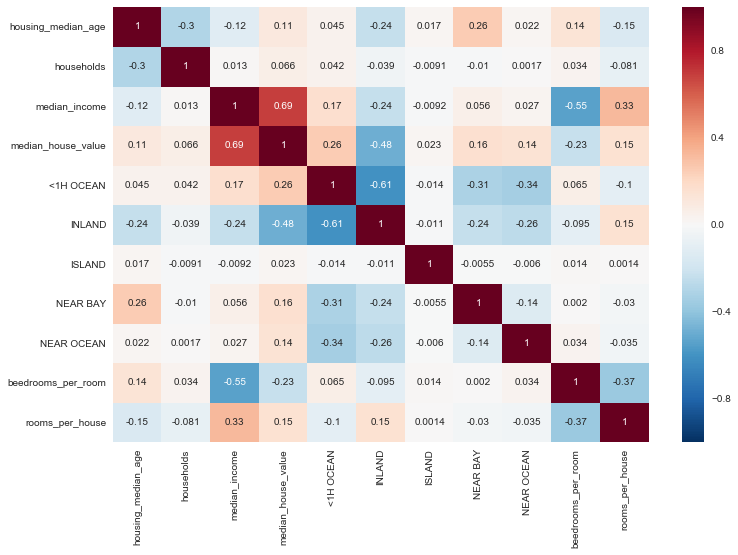

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(housing_post_cat.corr(), annot=True)

In [53]:
housing_post_cat.drop("<1H OCEAN, INLAND, ISLAND, NEAR BAY, NEAR OCEAN".split(", "), inplace=True, axis=1)

In [54]:
housing_post_cat.head()

housing_median_age  households  median_income  median_house_value  \
0                41.0       126.0         8.3252            452600.0   
1                21.0      1138.0         8.3014            358500.0   
2                52.0       177.0         7.2574            352100.0   
3                52.0       219.0         5.6431            341300.0   
4                52.0       259.0         3.8462            342200.0   

   beedrooms_per_room  rooms_per_house  
0            0.146591         6.984127  
1            0.155797         6.238137  
2            0.129516         8.288136  
3            0.184458         5.817352  
4            0.172096         6.281853

In [59]:
model = RandomForestRegressor()

In [62]:
y = housing_post_cat["median_house_value"]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(housing_post_cat.drop("median_house_value", axis=1), y)

In [67]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [68]:
pred = model.predict(X_test)

In [70]:
np.sqrt(mean_squared_error(y_test, pred))

72167.963855694601